In [150]:
#import dependencies 
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from functools import reduce
import config

In [143]:
#create engine and execute the query- fetch rows from the tables 
#password is blanked out for protection-must put in your own password
conn = psycopg2.connect("dbname=homework user=postgres password=*********** host=localhost")
cur = conn.cursor()
cur.execute("Select * from salaries  ")
rows = cur.fetchall()
#rows

In [144]:
#pull in salaries table from DB
salaries_df = pd.read_sql_query('''Select * from salaries;''', conn)

In [145]:
#pull down employees table 
employees_df = pd.read_sql_query('''Select * from employees; ''', conn)

In [146]:
#pull down titles table 
titles_df = pd.read_sql_query('''Select * from titles; ''', conn)

In [147]:
#merge all three tables on employee number
dfs = [salaries_df, employees_df, titles_df]

df_final = reduce(lambda left,right: pd.merge(left,right,on='emp_no'), dfs)

In [ ]:
#view merged table
df_final

In [117]:
#remove commas and $ from the salary column and change to float because it was a string
df_nocommas = df_final[df_final.columns[:2]].replace('[\$,]', '', regex=True).astype(float)


#set these columns to a varibale/list in order to create smaller data frame 
titles = df_final.title.tolist()
employee_no = df_nocommas.emp_no.tolist()
salary_amount = df_nocommas.salary.tolist()






In [118]:
#add titles list to the previous dataframe and view
df_nocommas['titles'] = titles
df_nocommas.head()



,emp_no,salary,titles
0,10001.0,60117.0,Senior Engineer
1,10002.0,65828.0,Staff
2,10003.0,40006.0,Senior Engineer
3,10004.0,40054.0,Engineer
4,10004.0,40054.0,Senior Engineer


In [148]:
#perform groupby on titles and find the mean salary
average_salary = df_nocommas.groupby('titles', as_index=True)['salary'].mean().round(2)

In [149]:
print(average_salary)


titles
Assistant Engineer    48493.20
Engineer              48539.78
Manager               51531.04
Senior Engineer       48506.75
Senior Staff          58503.29
Staff                 58465.27
Technique Leader      48580.51
Name: salary, dtype: float64


In [130]:
#Set each value to a varibale 
Assistant_Engineer = 48493.20
Engineer = 48539.78
Manager = 51531.04
Senior_Engineer = 48506.75
Senior_Staff =  58503.28
Staff = 58465.27
Technique_Leader =  48580.50

In [131]:
#create list of salaries
salaries1 = [Assistant_Engineer, Engineer, Manager, Senior_Engineer, Senior_Staff, Staff, Technique_Leader ]
x_axis = np.arange(len(salaries1))

Text(0, 0.5, 'Salary in Dollars')

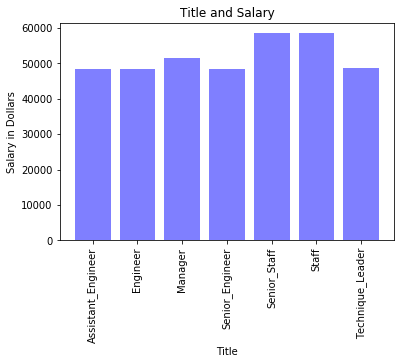

In [136]:
#plot the chart

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Assistant_Engineer", "Engineer", "Manager", "Senior_Engineer", "Senior_Staff", "Staff", "Technique_Leader" ], rotation='vertical')

plt.bar(x_axis, salaries1, color='b', alpha=0.5, align="center")

plt.title("Title and Salary")
plt.xlabel("Title")
plt.ylabel("Salary in Dollars")
